# <center>Loan default prediction<center>

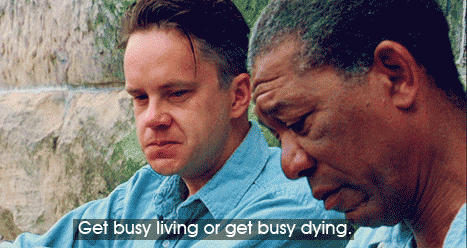
<div class="alert alert-block alert-info" style="margin-top: 20px">
<br> Project :Loan default prediction
<br> Owner: Nguyễn Huy Tuân
<br> Gmail: tuannhbob@gmail.com

Project :Loan default prediction
Owner: Nguyễn Huy Tuân
Gmail: tuannhbob@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [2]:
# Mô tả dữ liệu
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [3]:
df = pd.read_csv('train.csv')
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


Mục tiêu là phát hiện nhiều nhất các khoản loan bị default (1) nên sẽ ưu tiên recall

In [4]:
df.count()

LoanID            255347
Age               255347
Income            255347
LoanAmount        255347
CreditScore       255347
MonthsEmployed    255347
NumCreditLines    255347
InterestRate      255347
LoanTerm          255347
DTIRatio          255347
Education         255347
EmploymentType    255347
MaritalStatus     255347
HasMortgage       255347
HasDependents     255347
LoanPurpose       255347
HasCoSigner       255347
Default           255347
dtype: int64


# Dữ liệu Imbalance data, 1 là default

Default
0    225694
1     29653
Name: count, dtype: int64


<Axes: xlabel='Default'>

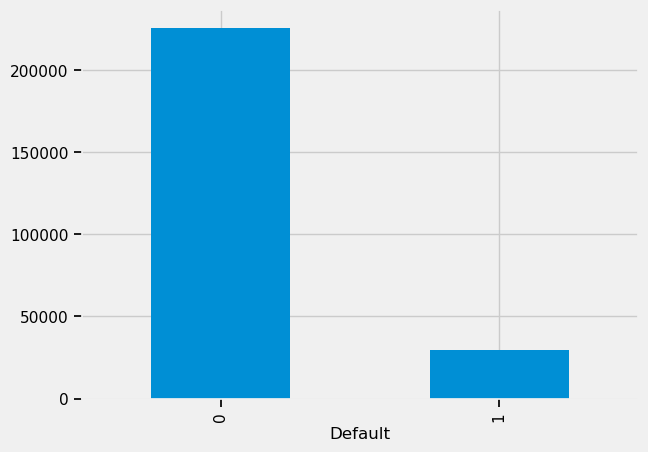

In [5]:
print(df["Default"].value_counts())
df["Default"].value_counts().plot(kind="bar")

In [6]:
#kiểm tra nan data

df[df.isna().any(axis=1)]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


In [7]:
# Drop dữ liệu id
df.drop(columns=["LoanID"], inplace=True)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [8]:
# Kiểm tra dữ liệu dạng Object
object_cols = [f for f in df.columns if df[f].dtype =="O"]
print(object_cols)

['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


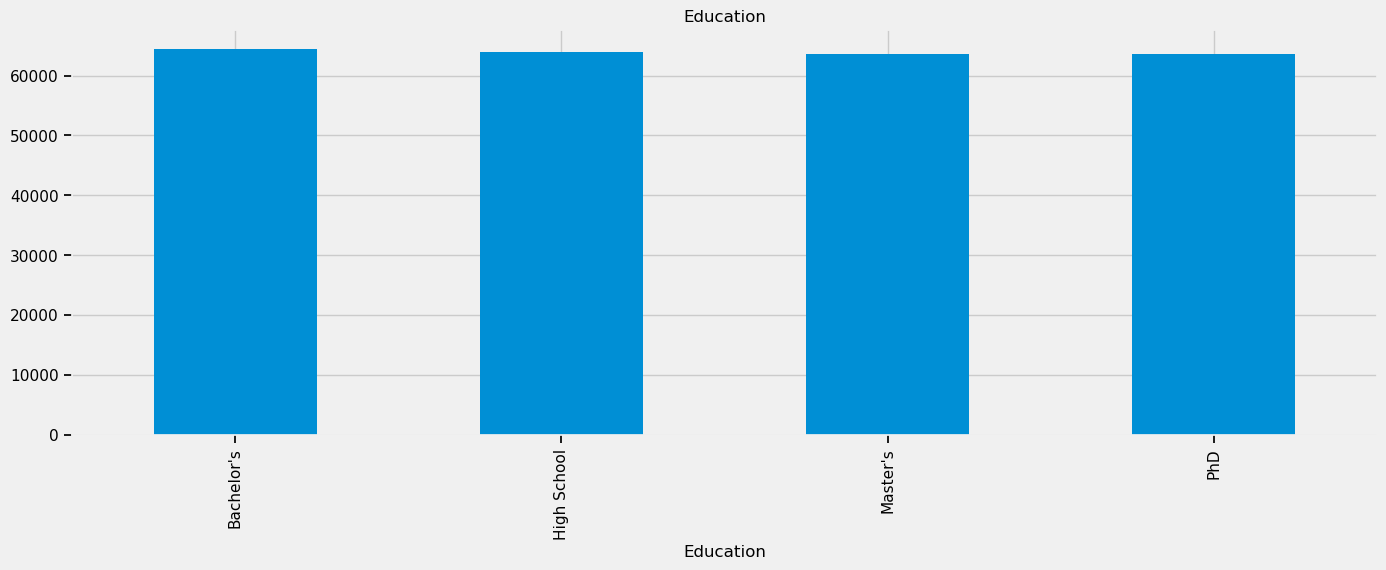

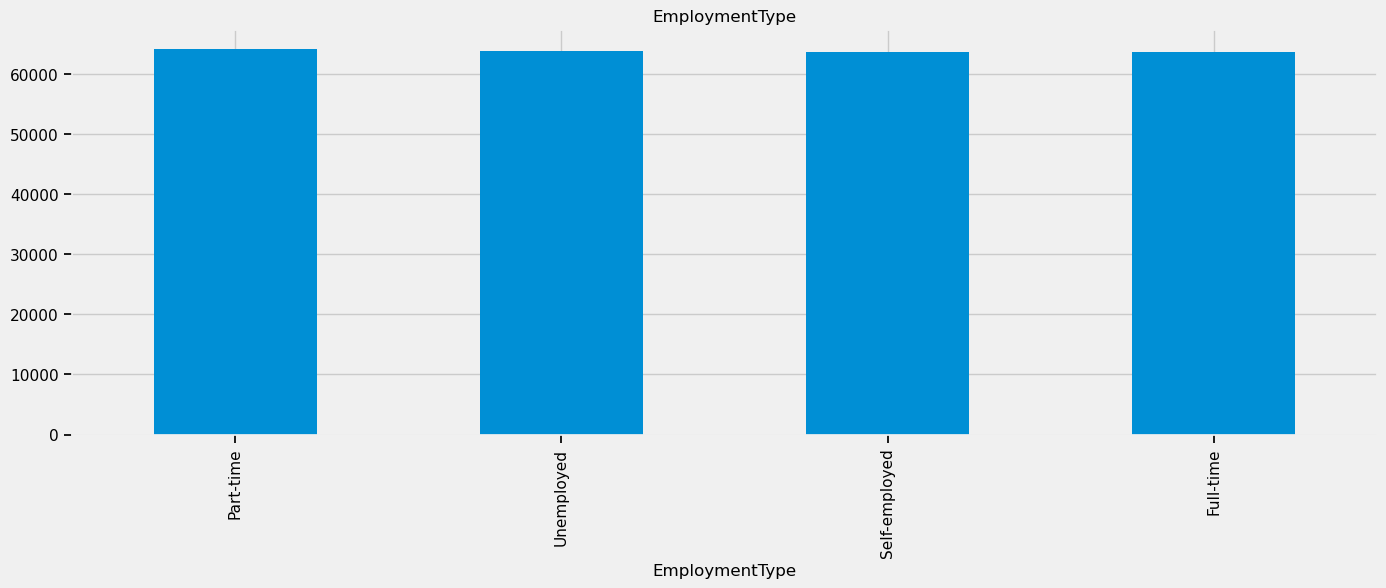

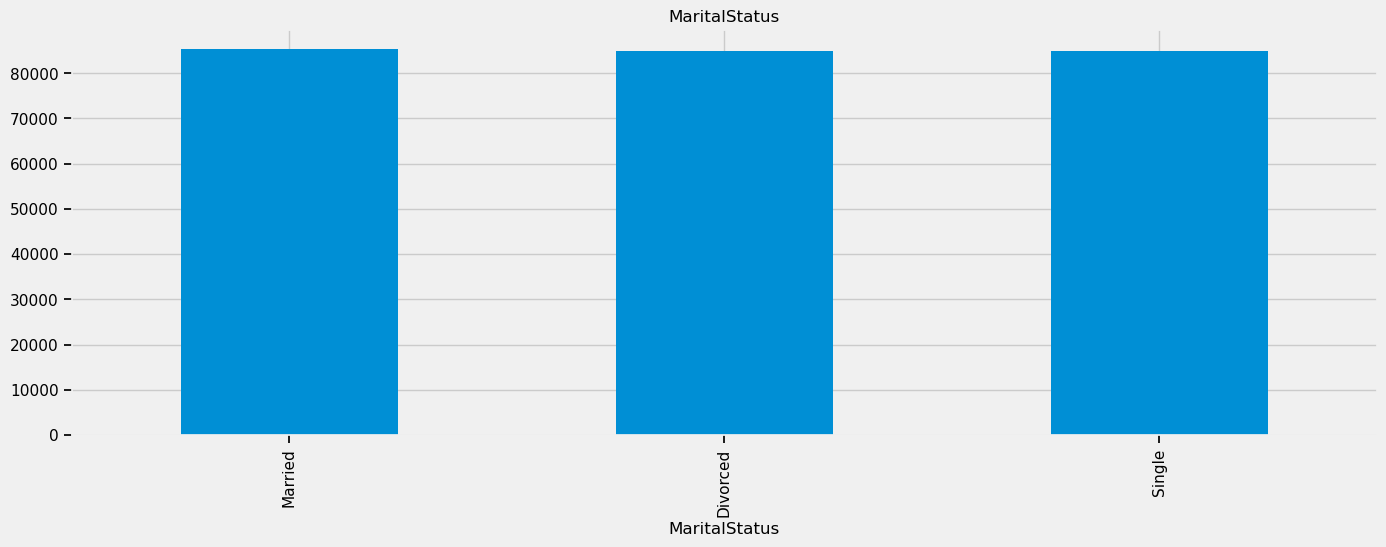

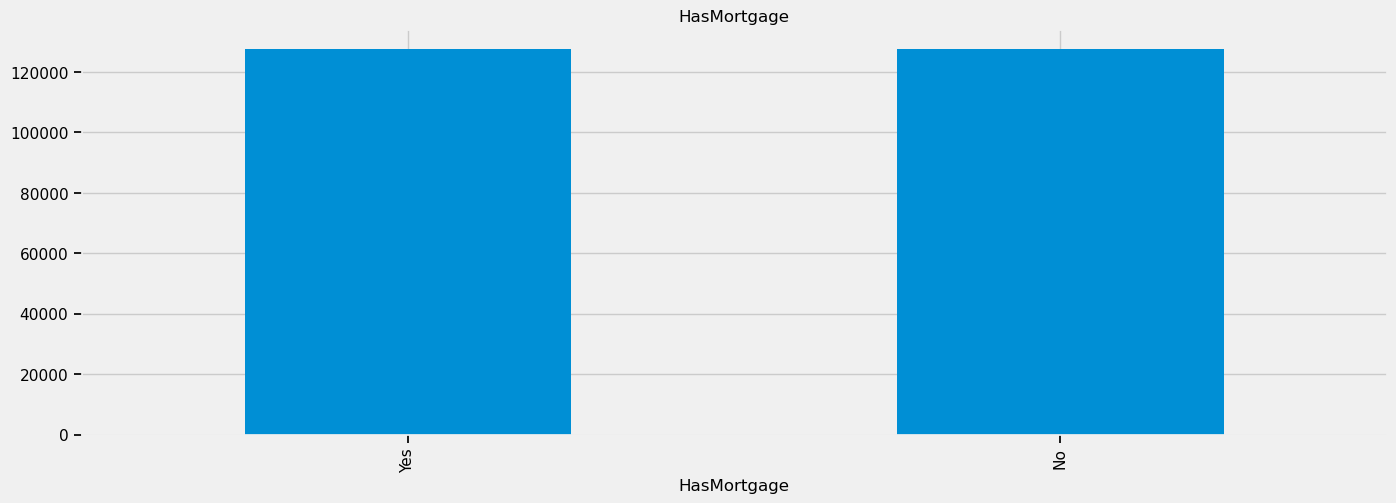

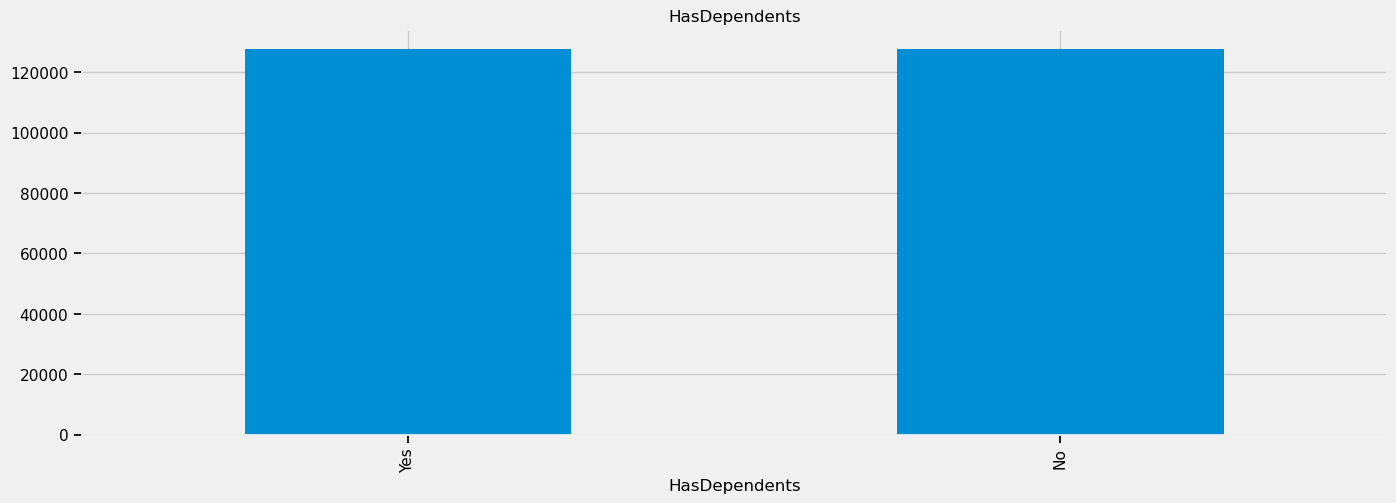

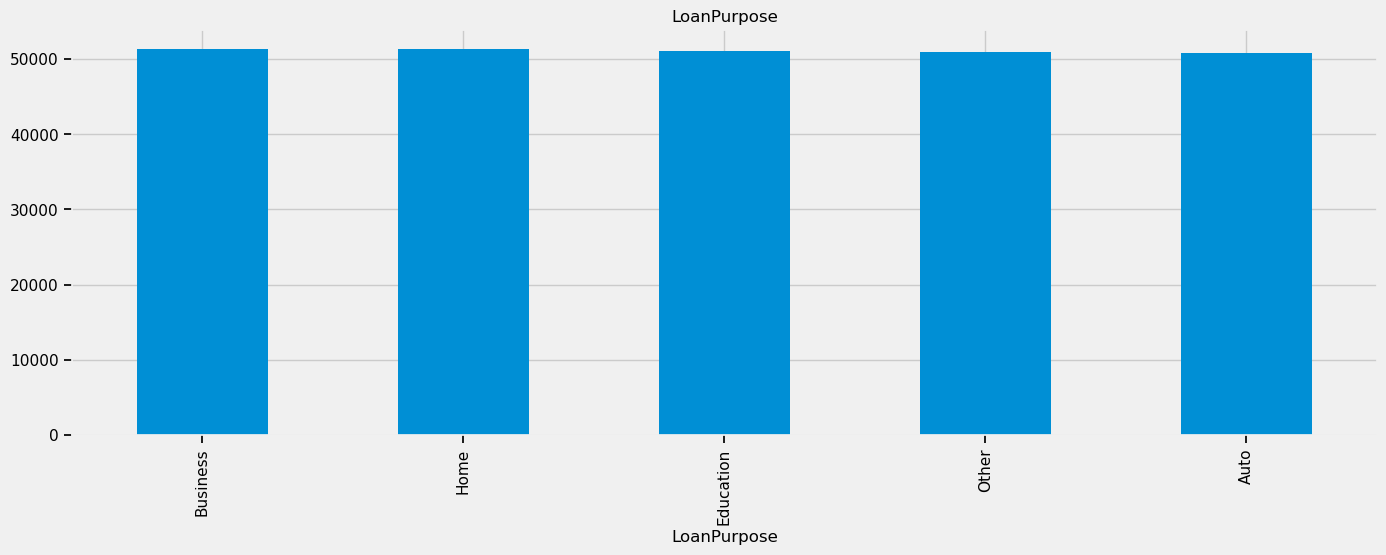

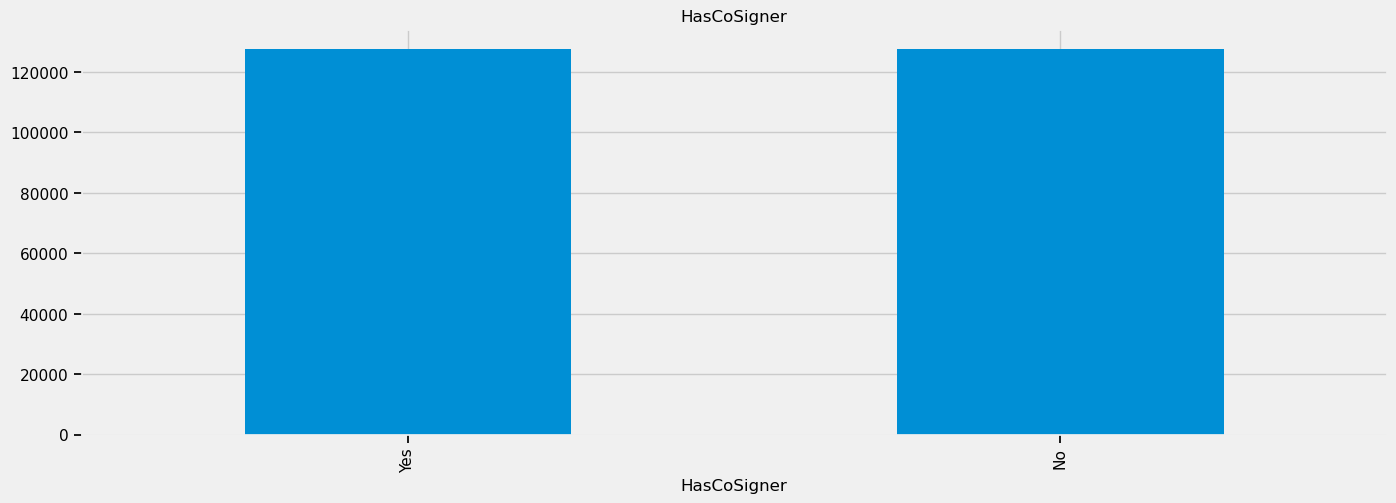

In [9]:
for col in object_cols:
  df[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [10]:
# tạo biến dummy, drop cột đầu của biến dummy vừa tạo

df_loan = pd.get_dummies(df,drop_first=True)

In [11]:
df_loan

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,False,True,False,False,False,False,False,False,True,False
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,False,False,False,False,False,False,False,True,False,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,False,True,False,True,True,False,False,False,False,True
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,False,False,True,True,True,False,False,False,True,False


In [13]:
# Kiểm tra sự độc lập của các biến

corr=df_loan.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783,0.000269,0.000664,-0.001293,-0.002659,-0.000082,0.001620,0.001888,-0.002838,0.000035,0.000710,-0.003104,-0.002300,-0.000474,0.004286,-0.002918
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119,-0.003042,0.004962,-0.003124,-0.001635,-0.000778,-0.003362,-0.000821,0.000962,-0.000945,-0.001570,0.005124,-0.003610,-0.001250,-0.000388,-0.003524
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659,-0.001510,0.001073,0.001989,-0.002038,-0.001157,0.004083,-0.003279,0.000973,-0.000801,0.000139,-0.003093,0.000472,0.000308,0.000358,-0.001848
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166,0.001993,-0.002675,0.001303,-0.000615,0.001508,0.002214,0.000106,-0.002839,0.001728,-0.003018,-0.000638,-0.003306,0.002513,0.000451,-0.002755
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374,-0.000047,0.002379,-0.002695,0.001363,0.000678,-0.000421,0.001055,-0.000611,0.000210,0.001450,0.001518,0.001159,-0.004033,-0.000208,0.001045
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330,0.000326,0.000427,0.001928,0.000170,0.000745,-0.000365,0.000726,-0.000938,-0.001744,-0.001895,0.000988,0.002040,0.000366,-0.001244,0.002105
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273,-0.002427,0.000571,0.002913,0.000283,-0.001022,0.001038,-0.001474,-0.003660,-0.000424,-0.000243,-0.001029,0.001493,0.002580,-0.001128,-0.003991
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545,-0.000600,-0.001493,-0.001391,0.000514,-0.002749,0.002330,-0.000094,-0.000855,0.001775,0.002417,-0.003032,0.000942,-0.000316,0.003051,-0.001166
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236,-0.001629,0.002322,0.000539,0.000894,-0.000336,-0.000572,-0.000370,0.004075,0.000231,0.001492,0.000481,0.002513,-0.001672,-0.003497,0.000373
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000,0.022831,-0.013314,-0.018447,0.006372,-0.002714,0.034957,-0.026875,0.006607,-0.022856,-0.034678,0.011162,0.003512,-0.021564,0.002737,-0.039109


# Tiến hành chạy các mô hình

In [14]:
predictors = df_loan.drop(columns=["Default"]).columns.values
X = df_loan[predictors]
y = df_loan["Default"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[predictors])
X[predictors] = scaler.transform(X[predictors])

X

C:\Users\BOB\AppData\Local\Temp\ipykernel_20728\986014062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[predictors] = scaler.transform(X[predictors])


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,0.019608,0.170216,0.839522,0.438980,0.915966,1.000000,0.526522,0.00,0.9375,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255343,0.274510,0.273728,0.754693,0.384335,0.117647,0.333333,0.415217,0.25,0.1375,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
255344,0.745098,0.517189,0.829775,0.540984,0.588235,0.666667,0.143043,1.00,0.5000,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
255345,0.470588,0.519330,0.226838,0.927140,0.336134,0.000000,0.821739,0.75,0.4250,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# Chia dữ liệu train- test

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Train với imbalance data

In [17]:
# Train model voi imabalance data
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix
# Khoi tao
model = LogisticRegression() 

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print(classification_report( y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070



array([[45046,   124],
       [ 5710,   190]], dtype=int64)

Recall thấp chỉ phát hiện được 3% default

### Class weight


In [18]:
# Train model voi imabalance data

# Khoi tao
model = LogisticRegression(class_weight="balanced") 

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print(classification_report( y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45170
           1       0.22      0.70      0.33      5900

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070



array([[30545, 14625],
       [ 1790,  4110]], dtype=int64)

recall đã tăng lên, phát hiện 70% default

### Sử dụng sinh dữ liệu bằng smote


In [19]:
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [20]:


# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     45170
           1       0.22      0.69      0.34      5900

    accuracy                           0.69     51070
   macro avg       0.58      0.69      0.57     51070
weighted avg       0.86      0.69      0.74     51070



array([[31015, 14155],
       [ 1853,  4047]], dtype=int64)

Recall vẫn tầm 70%

# Random forrest

In [21]:
# random forrest với dữ liệu imbalance 
from sklearn.ensemble import RandomForestClassifier

# Khoi tao model random forest
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42) 

# Fit vao du lieu train
model_RFC.fit(X_train, y_train)

# Du doan 
y_pred = model_RFC.predict(X_test)

# In ket qua
print(classification_report( y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



array([[45094,    76],
       [ 5730,   170]], dtype=int64)

In [23]:
# random forrest với dữ liệu đã được smote
from sklearn.ensemble import RandomForestClassifier

# Khoi tao model random forest
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42) 

# Fit vao du lieu train
model_RFC.fit(X_train_resample, y_train_resample)

# Du doan 
y_pred = model_RFC.predict(X_test)

# In ket qua
print(classification_report( y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     45170
           1       0.32      0.18      0.23      5900

    accuracy                           0.86     51070
   macro avg       0.61      0.57      0.58     51070
weighted avg       0.83      0.86      0.84     51070



array([[42904,  2266],
       [ 4818,  1082]], dtype=int64)

Recall đều rất thấp

#  xgboost

In [25]:
# xgboost với dữ liệu đã được imbalance
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# In bao cao ket qua
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.51      0.10      0.16      5900

    accuracy                           0.89     51070
   macro avg       0.70      0.54      0.55     51070
weighted avg       0.85      0.89      0.85     51070



In [26]:
# xgboost với dữ liệu đã được smote
import xgboost as xgb


model_xgb.fit(X_train_resample, y_train_resample)

y_pred = model_xgb.predict(X_test)

# In bao cao ket qua
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.51      0.10      0.17      5900

    accuracy                           0.89     51070
   macro avg       0.70      0.54      0.55     51070
weighted avg       0.85      0.89      0.85     51070



recall đều rất thấp

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.59      0.02      0.05      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.49     51070
weighted avg       0.85      0.89      0.84     51070

[[45073    97]
 [ 5758   142]]


In [28]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train_resample, y_train_resample)
y_pred = nb.predict(X_test)
print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.80     45170
           1       0.22      0.64      0.33      5900

    accuracy                           0.70     51070
   macro avg       0.58      0.67      0.57     51070
weighted avg       0.85      0.70      0.75     51070

[[31864 13306]
 [ 2132  3768]]


recall 64%, accuracy 70% khi dùng với dữ liệu đã được smote


# Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
y_pred = dtree.predict(X_test)

print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.49      0.06      0.11      5900

    accuracy                           0.88     51070
   macro avg       0.69      0.53      0.52     51070
weighted avg       0.84      0.88      0.84     51070

[[44785   385]
 [ 5531   369]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train_resample, y_train_resample)

# predict on test set
y_pred = dtree.predict(X_test)

print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     45170
           1       0.24      0.33      0.28      5900

    accuracy                           0.80     51070
   macro avg       0.57      0.60      0.58     51070
weighted avg       0.83      0.80      0.81     51070

[[38977  6193]
 [ 3969  1931]]


recall vẫn rất thấp 

# Light Gradient Boosting

In [115]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 163.8 kB/s eta 0:00:08
    --------------------------------------- 0.0/1.3 MB 163.8 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.3 MB 151.3 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.3 MB 182.2 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.3 MB 182.2 kB/s e

In [31]:
#dùng với data gốc và calss_weight,
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(class_weight="balanced")

lgbm_model=lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23753, number of negative: 180524
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 204277, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45170
           1       0.23      0.68      0.34      5900

    accuracy                           0.70     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.70      0.75     51070

[[31557 13613]
 [ 1881  4019]]


In [32]:
#dùng với data đã smote
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

lgbm_model=lgbm.fit(X_train_resample, y_train_resample)
y_pred = lgbm_model.predict(X_test)

print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 180524, number of negative: 180524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6118
[LightGBM] [Info] Number of data points in the train set: 361048, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070

[[44739   431]
 [ 5397   503]]


Khi sử dụng với data gốc và class_weight, thì recall 68%, accuracy 70% 

Tổng kết thuật toán tối ưu trong các cách đã dùng là LogisticRegression hoặc Light Gradient Boosting với class_weight= balance 